In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import warnings
from smiles_lstm import token, data, model, plot, utils
warnings.simplefilter("ignore")


with open("validation_data/train.smi") as f:
    train_smiles_list = f.readlines()

with open("validation_data/valid.smi") as f:
    valid_smiles_list = f.readlines()

# SMILESを系列モデル（シーケンス）に変換するインスタンスを生成
smiles_vocab = token.SmilesVocabulary()

print("SMILESのリストを読み込む")
train_smiles_tensor = smiles_vocab.batch_update(train_smiles_list)
valid_smiles_tensor = smiles_vocab.batch_update(valid_smiles_list)

print("右側が0でpaddingされたシーケンスが生成される")
print(train_smiles_tensor)
print(train_smiles_tensor.shape)
print("読み込んだSMILESリストから得られた語彙リスト")
print(smiles_vocab.char_list)
print("訓練データの最初の分子を表示")
s = smiles_vocab.seq2smiles(train_smiles_tensor[0])
print(s)
print(smiles_vocab.smiles2seq(s))

SMILESのリストを読み込む


100%|██████████| 79568/79568 [00:01<00:00, 67978.99it/s]


右側が0でpaddingされたシーケンスが生成される
tensor([[ 1,  6,  6,  ...,  0,  0,  0],
        [ 1,  6,  6,  ...,  0,  0,  0],
        [ 1, 13, 14,  ...,  0,  0,  0],
        ...,
        [ 1, 12,  6,  ...,  0,  0,  0],
        [ 1,  6, 13,  ...,  0,  0,  0],
        [ 1, 13, 11,  ...,  0,  0,  0]])
torch.Size([1273104, 102])
読み込んだSMILESリストから得られた語彙リスト
[' ', '!', '?', '(', ')', 'B', 'C', 'r', '-', '1', '2', '=', 'N', 'O', 'c', '3', 'S', '4', 'l', 'n', '#', 'o', 'F', 'H', '[', ']', '5', 'P', 's', '+', 'I', '6', 'i', '7', 'e', '8', '9', '%', '0', 'p', 'b']
訓練データの最初の分子を表示
CCC(C)(C)Br
tensor([1, 6, 6, 6, 3, 6, 4, 3, 6, 4, 5, 7, 2])


cuda


  1%|          | 105/9947 [00:03<04:44, 34.59it/s]

#update: 100,	per-example train loss:	0.011020996635779738


  2%|▏         | 205/9947 [00:06<04:42, 34.51it/s]

#update: 200,	per-example train loss:	0.007501157945953309


  3%|▎         | 305/9947 [00:09<04:38, 34.63it/s]

#update: 300,	per-example train loss:	0.00526181569788605


  4%|▍         | 405/9947 [00:11<04:33, 34.83it/s]

#update: 400,	per-example train loss:	0.004379612219054252


  5%|▌         | 505/9947 [00:14<04:34, 34.43it/s]

#update: 500,	per-example train loss:	0.003982589016668498


  6%|▌         | 605/9947 [00:17<04:30, 34.57it/s]

#update: 600,	per-example train loss:	0.003707200614735484


  7%|▋         | 705/9947 [00:20<04:28, 34.39it/s]

#update: 700,	per-example train loss:	0.0035483071859925986


  8%|▊         | 805/9947 [00:23<04:25, 34.47it/s]

#update: 800,	per-example train loss:	0.0033911179890856145


  9%|▉         | 905/9947 [00:26<04:20, 34.72it/s]

#update: 900,	per-example train loss:	0.003273915178142488


 10%|█         | 997/9947 [00:29<04:17, 34.76it/s]

#update: 1000,	per-example train loss:	0.0031924525322392584


 10%|█         | 1005/9947 [00:35<55:24,  2.69it/s]  

#update: 1000,	per-example val loss:	0.003148595928897111


 11%|█         | 1105/9947 [00:38<04:13, 34.85it/s]

#update: 1100,	per-example train loss:	0.0031214530393481256


 12%|█▏        | 1205/9947 [00:41<04:13, 34.47it/s]

#update: 1200,	per-example train loss:	0.0030556154553778468


 13%|█▎        | 1305/9947 [00:44<04:10, 34.55it/s]

#update: 1300,	per-example train loss:	0.002997816582210362


 14%|█▍        | 1405/9947 [00:47<04:06, 34.59it/s]

#update: 1400,	per-example train loss:	0.002938913498073816


 15%|█▌        | 1505/9947 [00:50<04:04, 34.46it/s]

#update: 1500,	per-example train loss:	0.002911056426819414


 16%|█▌        | 1605/9947 [00:53<04:01, 34.54it/s]

#update: 1600,	per-example train loss:	0.002887613393831998


 17%|█▋        | 1705/9947 [00:56<03:58, 34.57it/s]

#update: 1700,	per-example train loss:	0.0028511491836979985


 18%|█▊        | 1805/9947 [00:58<03:55, 34.53it/s]

#update: 1800,	per-example train loss:	0.002790691389236599


 19%|█▉        | 1905/9947 [01:01<03:51, 34.71it/s]

#update: 1900,	per-example train loss:	0.002809806982986629


 20%|██        | 1997/9947 [01:04<03:49, 34.64it/s]

#update: 2000,	per-example train loss:	0.0027559433598071336


 20%|██        | 2005/9947 [01:11<49:11,  2.69it/s]  

#update: 2000,	per-example val loss:	0.0027651333799010762


 21%|██        | 2105/9947 [01:14<03:47, 34.42it/s]

#update: 2100,	per-example train loss:	0.002739714663475752


 22%|██▏       | 2205/9947 [01:17<03:45, 34.29it/s]

#update: 2200,	per-example train loss:	0.002714747900608927


 23%|██▎       | 2305/9947 [01:19<03:39, 34.75it/s]

#update: 2300,	per-example train loss:	0.002696055271662772


 24%|██▍       | 2405/9947 [01:22<03:35, 35.04it/s]

#update: 2400,	per-example train loss:	0.002679858240298927


 25%|██▌       | 2505/9947 [01:25<03:34, 34.76it/s]

#update: 2500,	per-example train loss:	0.0026732882810756565


 26%|██▌       | 2605/9947 [01:28<03:31, 34.79it/s]

#update: 2600,	per-example train loss:	0.002650980707257986


 27%|██▋       | 2705/9947 [01:31<03:30, 34.48it/s]

#update: 2700,	per-example train loss:	0.0026428683474659918


 28%|██▊       | 2805/9947 [01:34<03:27, 34.46it/s]

#update: 2800,	per-example train loss:	0.002611886002123356


 29%|██▉       | 2905/9947 [01:37<03:23, 34.69it/s]

#update: 2900,	per-example train loss:	0.0026211420400068164


 30%|███       | 2997/9947 [01:39<03:19, 34.88it/s]

#update: 3000,	per-example train loss:	0.002604856784455478


 30%|███       | 3005/9947 [01:46<42:52,  2.70it/s]

#update: 3000,	per-example val loss:	0.002587595786738271


 31%|███       | 3105/9947 [01:49<03:16, 34.78it/s]

#update: 3100,	per-example train loss:	0.002580478456802666


 32%|███▏      | 3205/9947 [01:52<03:16, 34.28it/s]

#update: 3200,	per-example train loss:	0.0025758531410247087


 33%|███▎      | 3305/9947 [01:55<03:12, 34.54it/s]

#update: 3300,	per-example train loss:	0.0025624820846132934


 34%|███▍      | 3405/9947 [01:58<03:09, 34.58it/s]

#update: 3400,	per-example train loss:	0.0025491447187960146


 35%|███▌      | 3505/9947 [02:01<03:06, 34.51it/s]

#update: 3500,	per-example train loss:	0.0025460853800177573


 36%|███▌      | 3605/9947 [02:04<03:03, 34.61it/s]

#update: 3600,	per-example train loss:	0.0025230216141790152


 37%|███▋      | 3705/9947 [02:06<02:59, 34.83it/s]

#update: 3700,	per-example train loss:	0.0025091410567983983


 38%|███▊      | 3805/9947 [02:09<02:55, 34.94it/s]

#update: 3800,	per-example train loss:	0.0025101690576411783


 39%|███▉      | 3905/9947 [02:12<02:54, 34.65it/s]

#update: 3900,	per-example train loss:	0.002516357155982405


 40%|████      | 3997/9947 [02:15<02:51, 34.70it/s]

#update: 4000,	per-example train loss:	0.002503598688635975


 40%|████      | 4005/9947 [02:22<36:55,  2.68it/s]

#update: 4000,	per-example val loss:	0.0024911050647107645


 41%|████▏     | 4105/9947 [02:25<02:49, 34.56it/s]

#update: 4100,	per-example train loss:	0.0024944871058687566


 42%|████▏     | 4205/9947 [02:27<02:47, 34.33it/s]

#update: 4200,	per-example train loss:	0.0025052046566270292


 43%|████▎     | 4305/9947 [02:30<02:42, 34.78it/s]

#update: 4300,	per-example train loss:	0.002474221515003592


 44%|████▍     | 4405/9947 [02:33<02:40, 34.60it/s]

#update: 4400,	per-example train loss:	0.0024749984638765456


 45%|████▌     | 4505/9947 [02:36<02:36, 34.82it/s]

#update: 4500,	per-example train loss:	0.0024777620751410723


 46%|████▋     | 4605/9947 [02:39<02:34, 34.52it/s]

#update: 4600,	per-example train loss:	0.0024566383357159795


 47%|████▋     | 4705/9947 [02:42<02:31, 34.55it/s]

#update: 4700,	per-example train loss:	0.0024495197157375515


 48%|████▊     | 4805/9947 [02:45<02:31, 33.99it/s]

#update: 4800,	per-example train loss:	0.0024445440899580717


 49%|████▉     | 4905/9947 [02:48<02:27, 34.21it/s]

#update: 4900,	per-example train loss:	0.0024439188349060716


 50%|█████     | 4997/9947 [02:50<02:23, 34.52it/s]

#update: 5000,	per-example train loss:	0.002432105136103928


 50%|█████     | 5005/9947 [02:57<30:23,  2.71it/s]

#update: 5000,	per-example val loss:	0.0024274027777699764


 51%|█████▏    | 5105/9947 [03:00<02:18, 34.98it/s]

#update: 5100,	per-example train loss:	0.002416818116325885


 52%|█████▏    | 5205/9947 [03:03<02:17, 34.53it/s]

#update: 5200,	per-example train loss:	0.0024201122811064123


 53%|█████▎    | 5305/9947 [03:06<02:14, 34.62it/s]

#update: 5300,	per-example train loss:	0.0024085692898370326


 54%|█████▍    | 5405/9947 [03:09<02:12, 34.21it/s]

#update: 5400,	per-example train loss:	0.0024030914949253203


 55%|█████▌    | 5505/9947 [03:11<02:08, 34.51it/s]

#update: 5500,	per-example train loss:	0.0023958727391436697


 56%|█████▋    | 5605/9947 [03:14<02:04, 34.98it/s]

#update: 5600,	per-example train loss:	0.0023935621744021773


 57%|█████▋    | 5705/9947 [03:17<02:00, 35.11it/s]

#update: 5700,	per-example train loss:	0.0023975691618397833


 58%|█████▊    | 5805/9947 [03:20<02:00, 34.42it/s]

#update: 5800,	per-example train loss:	0.002391317798756063


 59%|█████▉    | 5905/9947 [03:23<01:56, 34.62it/s]

#update: 5900,	per-example train loss:	0.002380422290880233


 60%|██████    | 5997/9947 [03:26<01:54, 34.63it/s]

#update: 6000,	per-example train loss:	0.0023755324725061653


 60%|██████    | 6005/9947 [03:32<24:23,  2.69it/s]

#update: 6000,	per-example val loss:	0.002368917546023216


 61%|██████▏   | 6105/9947 [03:35<01:52, 34.20it/s]

#update: 6100,	per-example train loss:	0.002373546005692333


 62%|██████▏   | 6205/9947 [03:38<01:48, 34.54it/s]

#update: 6200,	per-example train loss:	0.0023809998529031873


 63%|██████▎   | 6305/9947 [03:41<01:45, 34.58it/s]

#update: 6300,	per-example train loss:	0.0023586955736391245


 64%|██████▍   | 6405/9947 [03:44<01:43, 34.38it/s]

#update: 6400,	per-example train loss:	0.002357972161844373


 65%|██████▌   | 6505/9947 [03:47<01:39, 34.53it/s]

#update: 6500,	per-example train loss:	0.002359067890793085


 66%|██████▋   | 6605/9947 [03:50<01:36, 34.63it/s]

#update: 6600,	per-example train loss:	0.002353466341737658


 67%|██████▋   | 6705/9947 [03:53<01:31, 35.35it/s]

#update: 6700,	per-example train loss:	0.0023482199991121887


 68%|██████▊   | 6805/9947 [03:56<01:30, 34.56it/s]

#update: 6800,	per-example train loss:	0.002349946447648108


 69%|██████▉   | 6905/9947 [03:58<01:27, 34.58it/s]

#update: 6900,	per-example train loss:	0.002333065571729094


 70%|███████   | 6997/9947 [04:01<01:25, 34.59it/s]

#update: 7000,	per-example train loss:	0.002335530126001686


 70%|███████   | 7005/9947 [04:08<18:07,  2.71it/s]

#update: 7000,	per-example val loss:	0.0023265580547250256


 71%|███████▏  | 7105/9947 [04:11<01:22, 34.51it/s]

#update: 7100,	per-example train loss:	0.002330658412538469


 72%|███████▏  | 7205/9947 [04:14<01:19, 34.69it/s]

#update: 7200,	per-example train loss:	0.00232697696890682


 73%|███████▎  | 7305/9947 [04:17<01:16, 34.64it/s]

#update: 7300,	per-example train loss:	0.0023216258501634


 74%|███████▍  | 7405/9947 [04:19<01:13, 34.63it/s]

#update: 7400,	per-example train loss:	0.002319268777500838


 75%|███████▌  | 7505/9947 [04:22<01:10, 34.60it/s]

#update: 7500,	per-example train loss:	0.0023097127652727065


 76%|███████▋  | 7605/9947 [04:25<01:08, 34.34it/s]

#update: 7600,	per-example train loss:	0.0023122723354026676


 77%|███████▋  | 7705/9947 [04:28<01:04, 34.57it/s]

#update: 7700,	per-example train loss:	0.0023028617072850467


 78%|███████▊  | 7805/9947 [04:31<01:00, 35.12it/s]

#update: 7800,	per-example train loss:	0.002298315337393433


 79%|███████▉  | 7905/9947 [04:34<00:59, 34.46it/s]

#update: 7900,	per-example train loss:	0.0023193174530752


 80%|████████  | 7997/9947 [04:37<00:56, 34.57it/s]

#update: 8000,	per-example train loss:	0.002308120857924223


 80%|████████  | 8005/9947 [04:43<12:02,  2.69it/s]

#update: 8000,	per-example val loss:	0.002300447000989534


 81%|████████▏ | 8105/9947 [04:46<00:53, 34.42it/s]

#update: 8100,	per-example train loss:	0.002293935255147517


 82%|████████▏ | 8205/9947 [04:49<00:50, 34.47it/s]

#update: 8200,	per-example train loss:	0.0022825218411162496


 83%|████████▎ | 8305/9947 [04:52<00:47, 34.68it/s]

#update: 8300,	per-example train loss:	0.002272623754106462


 84%|████████▍ | 8405/9947 [04:55<00:44, 34.46it/s]

#update: 8400,	per-example train loss:	0.002281707376241684


 86%|████████▌ | 8505/9947 [04:58<00:42, 34.13it/s]

#update: 8500,	per-example train loss:	0.002283464721404016


 87%|████████▋ | 8605/9947 [05:01<00:38, 34.95it/s]

#update: 8600,	per-example train loss:	0.002286555722821504


 88%|████████▊ | 8705/9947 [05:04<00:36, 34.43it/s]

#update: 8700,	per-example train loss:	0.0022661760961636902


 89%|████████▊ | 8805/9947 [05:06<00:32, 35.25it/s]

#update: 8800,	per-example train loss:	0.002269443378318101


 90%|████████▉ | 8905/9947 [05:09<00:30, 34.51it/s]

#update: 8900,	per-example train loss:	0.002273125082720071


 90%|█████████ | 8997/9947 [05:12<00:27, 35.04it/s]

#update: 9000,	per-example train loss:	0.0022582475887611506


 91%|█████████ | 9005/9947 [05:19<05:50,  2.69it/s]

#update: 9000,	per-example val loss:	0.0022737984259933288


 92%|█████████▏| 9105/9947 [05:22<00:24, 34.27it/s]

#update: 9100,	per-example train loss:	0.0022697176178917288


 93%|█████████▎| 9205/9947 [05:25<00:21, 35.24it/s]

#update: 9200,	per-example train loss:	0.002266657962463796


 94%|█████████▎| 9305/9947 [05:27<00:18, 34.45it/s]

#update: 9300,	per-example train loss:	0.002262641361448914


 95%|█████████▍| 9405/9947 [05:30<00:15, 34.25it/s]

#update: 9400,	per-example train loss:	0.0022487734956666825


 96%|█████████▌| 9505/9947 [05:33<00:12, 34.43it/s]

#update: 9500,	per-example train loss:	0.0022379543818533422


 97%|█████████▋| 9605/9947 [05:36<00:09, 34.88it/s]

#update: 9600,	per-example train loss:	0.0022545078885741533


 98%|█████████▊| 9705/9947 [05:39<00:07, 34.47it/s]

#update: 9700,	per-example train loss:	0.0022417967999354004


 99%|█████████▊| 9805/9947 [05:42<00:04, 34.72it/s]

#update: 9800,	per-example train loss:	0.0022662485716864467


100%|█████████▉| 9905/9947 [05:45<00:01, 34.73it/s]

#update: 9900,	per-example train loss:	0.0022603025985881687


  1%|          | 51/9947 [00:01<04:45, 34.66it/s]

#update: 10000,	per-example train loss:	0.002258772930085734


  1%|          | 59/9947 [00:08<1:01:20,  2.69it/s]

#update: 10000,	per-example val loss:	0.00224007951257132


  2%|▏         | 159/9947 [00:11<04:43, 34.54it/s] 

#update: 10100,	per-example train loss:	0.0022234073420986534


  3%|▎         | 259/9947 [00:13<04:39, 34.67it/s]

#update: 10200,	per-example train loss:	0.0022207518247887494


  4%|▎         | 359/9947 [00:16<04:37, 34.53it/s]

#update: 10300,	per-example train loss:	0.002216270351782441


  5%|▍         | 459/9947 [00:19<04:33, 34.63it/s]

#update: 10400,	per-example train loss:	0.0022103326278738677


  6%|▌         | 559/9947 [00:22<04:29, 34.80it/s]

#update: 10500,	per-example train loss:	0.002202556089032441


  7%|▋         | 659/9947 [00:25<04:28, 34.56it/s]

#update: 10600,	per-example train loss:	0.0022029114607721566


  8%|▊         | 759/9947 [00:28<04:26, 34.46it/s]

#update: 10700,	per-example train loss:	0.0022148215165361763


  9%|▊         | 859/9947 [00:31<04:19, 34.99it/s]

#update: 10800,	per-example train loss:	0.002220755370799452


 10%|▉         | 959/9947 [00:34<04:22, 34.23it/s]

#update: 10900,	per-example train loss:	0.002224991344846785


 11%|█         | 1051/9947 [00:36<04:15, 34.79it/s]

#update: 11000,	per-example train loss:	0.002205895194783807


 11%|█         | 1059/9947 [00:43<54:47,  2.70it/s]  

#update: 11000,	per-example val loss:	0.002218812954286778


 12%|█▏        | 1159/9947 [00:46<04:11, 34.94it/s]

#update: 11100,	per-example train loss:	0.002211355436593294


 13%|█▎        | 1259/9947 [00:49<04:11, 34.48it/s]

#update: 11200,	per-example train loss:	0.002200837570708245


 14%|█▎        | 1359/9947 [00:52<04:08, 34.62it/s]

#update: 11300,	per-example train loss:	0.0022024256736040116


 15%|█▍        | 1459/9947 [00:55<04:05, 34.63it/s]

#update: 11400,	per-example train loss:	0.0021994707453995943


 16%|█▌        | 1555/9947 [00:57<04:02, 34.59it/s]

#update: 11500,	per-example train loss:	0.002188317363616079


 17%|█▋        | 1655/9947 [01:00<03:59, 34.64it/s]

#update: 11600,	per-example train loss:	0.0022015833645127715


 18%|█▊        | 1759/9947 [01:03<03:57, 34.50it/s]

#update: 11700,	per-example train loss:	0.002193606672808528


 19%|█▊        | 1859/9947 [01:06<03:54, 34.47it/s]

#update: 11800,	per-example train loss:	0.0021800796710886063


 20%|█▉        | 1959/9947 [01:09<03:49, 34.85it/s]

#update: 11900,	per-example train loss:	0.0021872681844979525


 21%|██        | 2051/9947 [01:12<03:48, 34.54it/s]

#update: 12000,	per-example train loss:	0.002180984744336456


 21%|██        | 2059/9947 [01:18<48:48,  2.69it/s]  

#update: 12000,	per-example val loss:	0.00220480148949998


 22%|██▏       | 2159/9947 [01:21<03:45, 34.53it/s]

#update: 12100,	per-example train loss:	0.002195305002387613


 23%|██▎       | 2259/9947 [01:24<03:40, 34.79it/s]

#update: 12200,	per-example train loss:	0.002179930629208684


 24%|██▎       | 2359/9947 [01:27<03:39, 34.58it/s]

#update: 12300,	per-example train loss:	0.002195219004061073


 25%|██▍       | 2459/9947 [01:30<03:35, 34.81it/s]

#update: 12400,	per-example train loss:	0.002173608778975904


 26%|██▌       | 2559/9947 [01:33<03:33, 34.65it/s]

#update: 12500,	per-example train loss:	0.002175003772135824


 27%|██▋       | 2659/9947 [01:36<03:29, 34.83it/s]

#update: 12600,	per-example train loss:	0.002181113457772881


 28%|██▊       | 2759/9947 [01:39<03:27, 34.68it/s]

#update: 12700,	per-example train loss:	0.0021673676557838915


 29%|██▊       | 2859/9947 [01:42<03:24, 34.67it/s]

#update: 12800,	per-example train loss:	0.00217379845213145


 30%|██▉       | 2955/9947 [01:44<03:20, 34.93it/s]

#update: 12900,	per-example train loss:	0.0021739871706813576


 31%|███       | 3051/9947 [01:47<03:19, 34.48it/s]

#update: 13000,	per-example train loss:	0.0021825603512115777


 31%|███       | 3059/9947 [01:54<42:26,  2.71it/s]

#update: 13000,	per-example val loss:	0.002186825155100184


 32%|███▏      | 3159/9947 [01:57<03:16, 34.57it/s]

#update: 13100,	per-example train loss:	0.002164903974626213


 33%|███▎      | 3259/9947 [02:00<03:12, 34.78it/s]

#update: 13200,	per-example train loss:	0.0021778050740249456


 34%|███▍      | 3359/9947 [02:03<03:10, 34.65it/s]

#update: 13300,	per-example train loss:	0.0021594649762846528


 35%|███▍      | 3459/9947 [02:05<03:06, 34.74it/s]

#update: 13400,	per-example train loss:	0.0021795560978353024


 36%|███▌      | 3559/9947 [02:08<03:03, 34.89it/s]

#update: 13500,	per-example train loss:	0.0021629462065175177


 37%|███▋      | 3659/9947 [02:11<03:02, 34.54it/s]

#update: 13600,	per-example train loss:	0.002159032009076327


 38%|███▊      | 3755/9947 [02:14<02:58, 34.64it/s]

#update: 13700,	per-example train loss:	0.002156560227740556


 39%|███▉      | 3859/9947 [02:17<02:54, 34.97it/s]

#update: 13800,	per-example train loss:	0.002157505638897419


 40%|███▉      | 3959/9947 [02:20<02:51, 34.87it/s]

#update: 13900,	per-example train loss:	0.002155016944743693


 41%|████      | 4051/9947 [02:22<02:50, 34.59it/s]

#update: 14000,	per-example train loss:	0.002167273790109903


 41%|████      | 4059/9947 [02:29<36:20,  2.70it/s]

#update: 14000,	per-example val loss:	0.0021643352033913123


 42%|████▏     | 4155/9947 [02:32<02:45, 34.91it/s]

#update: 14100,	per-example train loss:	0.0021615910390391947


 43%|████▎     | 4255/9947 [02:35<02:47, 34.07it/s]

#update: 14200,	per-example train loss:	0.002152896309271455


 44%|████▍     | 4359/9947 [02:38<02:37, 35.47it/s]

#update: 14300,	per-example train loss:	0.0021604862180538476


 45%|████▍     | 4459/9947 [02:41<02:39, 34.32it/s]

#update: 14400,	per-example train loss:	0.002166520718019456


 46%|████▌     | 4559/9947 [02:44<02:37, 34.30it/s]

#update: 14500,	per-example train loss:	0.0021489573549479247


 47%|████▋     | 4659/9947 [02:47<02:32, 34.57it/s]

#update: 14600,	per-example train loss:	0.002151348504703492


 48%|████▊     | 4759/9947 [02:49<02:26, 35.39it/s]

#update: 14700,	per-example train loss:	0.00214274472091347


 49%|████▉     | 4859/9947 [02:52<02:28, 34.34it/s]

#update: 14800,	per-example train loss:	0.0021428251115139575


 50%|████▉     | 4959/9947 [02:55<02:25, 34.26it/s]

#update: 14900,	per-example train loss:	0.0021591318608261646


 51%|█████     | 5051/9947 [02:58<02:21, 34.67it/s]

#update: 15000,	per-example train loss:	0.002141507021151483


 51%|█████     | 5059/9947 [03:05<30:10,  2.70it/s]

#update: 15000,	per-example val loss:	0.002155583262332675


 52%|█████▏    | 5159/9947 [03:08<02:18, 34.46it/s]

#update: 15100,	per-example train loss:	0.0021499038697220386


 53%|█████▎    | 5259/9947 [03:10<02:14, 34.78it/s]

#update: 15200,	per-example train loss:	0.0021448433632031082


 54%|█████▍    | 5359/9947 [03:13<02:11, 34.93it/s]

#update: 15300,	per-example train loss:	0.002138738592620939


 55%|█████▍    | 5459/9947 [03:16<02:08, 35.00it/s]

#update: 15400,	per-example train loss:	0.002149284847546369


 56%|█████▌    | 5559/9947 [03:19<02:06, 34.62it/s]

#update: 15500,	per-example train loss:	0.002145712645724416


 57%|█████▋    | 5659/9947 [03:22<02:04, 34.41it/s]

#update: 15600,	per-example train loss:	0.002138902279548347


 58%|█████▊    | 5759/9947 [03:25<02:01, 34.59it/s]

#update: 15700,	per-example train loss:	0.0021400759858079253


 59%|█████▉    | 5859/9947 [03:28<02:00, 33.96it/s]

#update: 15800,	per-example train loss:	0.002121626902371645


 60%|█████▉    | 5955/9947 [03:31<01:56, 34.25it/s]

#update: 15900,	per-example train loss:	0.002139325398020446


 61%|██████    | 6051/9947 [03:33<01:52, 34.76it/s]

#update: 16000,	per-example train loss:	0.00213996693957597


 61%|██████    | 6059/9947 [03:40<24:09,  2.68it/s]

#update: 16000,	per-example val loss:	0.0021464481244525533


 62%|██████▏   | 6159/9947 [03:43<01:48, 34.85it/s]

#update: 16100,	per-example train loss:	0.00213566429913044


 63%|██████▎   | 6259/9947 [03:46<01:47, 34.43it/s]

#update: 16200,	per-example train loss:	0.0021246815496124326


 64%|██████▍   | 6359/9947 [03:49<01:45, 34.08it/s]

#update: 16300,	per-example train loss:	0.0021269190264865756


 65%|██████▍   | 6459/9947 [03:52<01:40, 34.55it/s]

#update: 16400,	per-example train loss:	0.0021365875680930914


 66%|██████▌   | 6559/9947 [03:55<01:37, 34.74it/s]

#update: 16500,	per-example train loss:	0.002123651342699304


 67%|██████▋   | 6659/9947 [03:57<01:34, 34.94it/s]

#update: 16600,	per-example train loss:	0.00211946272989735


 68%|██████▊   | 6759/9947 [04:00<01:32, 34.47it/s]

#update: 16700,	per-example train loss:	0.002134055595379323


 69%|██████▉   | 6859/9947 [04:03<01:29, 34.65it/s]

#update: 16800,	per-example train loss:	0.0021308632451109586


 70%|██████▉   | 6959/9947 [04:06<01:26, 34.53it/s]

#update: 16900,	per-example train loss:	0.0021216198382899166


 71%|███████   | 7051/9947 [04:09<01:23, 34.74it/s]

#update: 17000,	per-example train loss:	0.002118259179405868


 71%|███████   | 7059/9947 [04:15<17:45,  2.71it/s]

#update: 17000,	per-example val loss:	0.0021327612003944132


 72%|███████▏  | 7159/9947 [04:18<01:20, 34.74it/s]

#update: 17100,	per-example train loss:	0.002130805014166981


 73%|███████▎  | 7259/9947 [04:21<01:18, 34.15it/s]

#update: 17200,	per-example train loss:	0.0021276835654862225


 74%|███████▍  | 7359/9947 [04:24<01:15, 34.46it/s]

#update: 17300,	per-example train loss:	0.002119324903469533


 75%|███████▍  | 7459/9947 [04:27<01:11, 34.88it/s]

#update: 17400,	per-example train loss:	0.0021232148609124125


 76%|███████▌  | 7559/9947 [04:30<01:09, 34.59it/s]

#update: 17500,	per-example train loss:	0.0021113863145001232


 77%|███████▋  | 7659/9947 [04:33<01:05, 35.00it/s]

#update: 17600,	per-example train loss:	0.002102692639455199


 78%|███████▊  | 7759/9947 [04:36<01:02, 34.86it/s]

#update: 17700,	per-example train loss:	0.002121591840405017


 79%|███████▉  | 7859/9947 [04:38<00:59, 34.86it/s]

#update: 17800,	per-example train loss:	0.0021150788967497646


 80%|████████  | 7959/9947 [04:41<00:57, 34.49it/s]

#update: 17900,	per-example train loss:	0.0021168054733425377


 81%|████████  | 8051/9947 [04:44<00:54, 34.62it/s]

#update: 18000,	per-example train loss:	0.0021164566883817315


 81%|████████  | 8059/9947 [04:51<11:37,  2.71it/s]

#update: 18000,	per-example val loss:	0.0021198131735838325


 82%|████████▏ | 8155/9947 [04:53<00:51, 34.58it/s]

#update: 18100,	per-example train loss:	0.0021185983018949628


 83%|████████▎ | 8259/9947 [04:56<00:47, 35.23it/s]

#update: 18200,	per-example train loss:	0.0021111554664094002


 84%|████████▍ | 8359/9947 [04:59<00:45, 34.86it/s]

#update: 18300,	per-example train loss:	0.0021136208204552533


 85%|████████▌ | 8459/9947 [05:02<00:43, 34.55it/s]

#update: 18400,	per-example train loss:	0.0021140542766079308


 86%|████████▌ | 8559/9947 [05:05<00:40, 34.60it/s]

#update: 18500,	per-example train loss:	0.002101982815656811


 87%|████████▋ | 8659/9947 [05:08<00:37, 34.47it/s]

#update: 18600,	per-example train loss:	0.0021058567753061653


 88%|████████▊ | 8759/9947 [05:11<00:34, 34.59it/s]

#update: 18700,	per-example train loss:	0.002099666001740843


 89%|████████▉ | 8859/9947 [05:14<00:31, 34.71it/s]

#update: 18800,	per-example train loss:	0.002107358539942652


 90%|█████████ | 8959/9947 [05:17<00:28, 34.89it/s]

#update: 18900,	per-example train loss:	0.0021086766384541987


 91%|█████████ | 9051/9947 [05:19<00:26, 34.31it/s]

#update: 19000,	per-example train loss:	0.0020998338237404822


 91%|█████████ | 9059/9947 [05:26<05:28,  2.70it/s]

#update: 19000,	per-example val loss:	0.002111118057247932


 92%|█████████▏| 9159/9947 [05:29<00:22, 34.50it/s]

#update: 19100,	per-example train loss:	0.002103073602775112


 93%|█████████▎| 9259/9947 [05:32<00:19, 34.60it/s]

#update: 19200,	per-example train loss:	0.0021139207785017787


 94%|█████████▍| 9359/9947 [05:35<00:17, 34.55it/s]

#update: 19300,	per-example train loss:	0.0021087188902311027


 95%|█████████▌| 9455/9947 [05:38<00:14, 34.55it/s]

#update: 19400,	per-example train loss:	0.0021121268766000866


 96%|█████████▌| 9559/9947 [05:41<00:11, 34.75it/s]

#update: 19500,	per-example train loss:	0.0021065003680996596


 97%|█████████▋| 9659/9947 [05:43<00:08, 34.67it/s]

#update: 19600,	per-example train loss:	0.0020991372806020083


 98%|█████████▊| 9759/9947 [05:46<00:05, 34.84it/s]

#update: 19700,	per-example train loss:	0.0020960776356514542


 99%|█████████▉| 9859/9947 [05:49<00:02, 34.58it/s]

#update: 19800,	per-example train loss:	0.002087157380301505


100%|██████████| 9947/9947 [05:52<00:00, 28.24it/s]


AttributeError: 'Axes' object has no attribute 'xlabel'

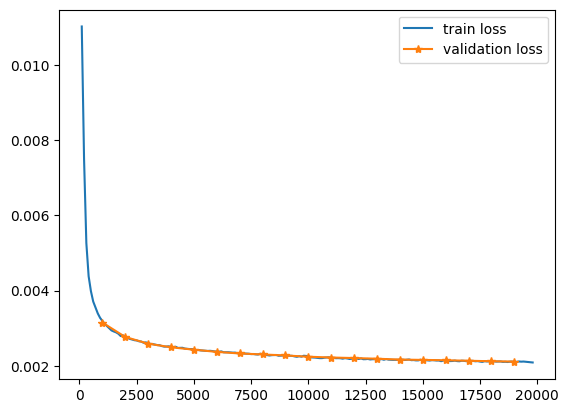

In [2]:
train_dataloader = data.make_dataloaders(train_smiles_tensor, batch_size=128)
valid_dataloader = data.make_dataloaders(valid_smiles_tensor, batch_size=128)

lr = 1e-3
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
smiles_lstm = model.SmilesLSTM(vocab=smiles_vocab, hidden_size=512, n_layers=3)
optimizer = optim.Adam(smiles_lstm.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss(reduction="none")


smiles_lstm, train_loss_list, valid_loss_list = utils.trainer(
    smiles_lstm,
    train_dataloader,
    valid_dataloader,
    optimizer,
    loss_function,
    n_epoch=2,
    print_freq=100,
    device=device,
)

plot.plot_minibatch_loss(train_loss_list, valid_loss_list)

generated_smiles_list = smiles_lstm.generate(sample_size=10000)
print(f"success rate: {utils.valid_ratio(generated_smiles_list)}")